In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15', # limit the rows to only top 15
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '484dce50-0d25-47d5-82de-9ccc975a922b',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
#   print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

In [2]:
type(data)

dict

In [3]:
import pandas as pd

# to see all the columns
pd.set_option('display.max_columns', None)
# to see all the rows = pd.set_option('display.max_rows', None)

In [4]:
# to normalize data and put them into dataframe
df = pd.json_normalize(data['data'])

# add timestamp as new column
# need to add utc=True to have standardized timezone
df['timestamp'] = pd.to_datetime('now', utc=True)

# to see top 3 rows of the dataframe
df.head(3)

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10207,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.0,1.936903e+07,1.936903e+07,False,NaN,1,NaN,NaN,None,2023-05-10T09:24:00.000Z,27580.103206,1.344075e+10,-18.827,0.001997,0.001682,-3.781172,-2.630213,35.368671,21.397992,5.341999e+11,46.9676,5.791822e+11,None,2023-05-10T09:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-10 09:26:16.094337+00:00
1,1027,Ethereum,ETH,ethereum,6858,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.203177e+08,1.203177e+08,False,NaN,2,NaN,NaN,None,2023-05-10T09:24:00.000Z,1838.278233,5.869048e+09,-26.609,-0.016741,-0.120445,-1.545179,-1.182238,27.200470,12.532853,2.211774e+11,19.4554,2.211774e+11,None,2023-05-10T09:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-10 09:26:16.094337+00:00
2,825,Tether,USDT,tether,53065,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.247941e+10,8.609064e+10,False,NaN,3,NaN,NaN,None,2023-05-10T09:24:00.000Z,1.000444,2.110268e+10,-23.861,-0.005152,-0.012104,-0.001059,-0.010789,-0.499910,0.022942,8.251599e+10,7.2583,8.612882e+10,None,2023-05-10T09:24:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-05-10 09:26:16.094337+00:00


In [15]:
# function to call api runner
# format using panda

def api_runner():

    global df # declare as a global variable
    
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15', # limit the rows to only top 15
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '484dce50-0d25-47d5-82de-9ccc975a922b',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
    #   print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

#     df2 = pd.json_normalize(data['data'])
#     df2['timestamp'] = pd.to_datetime('now', utc=True)
#     df_append = pd.DataFrame(df2)
#     df = pd.concat([df, df_append])
    # looping the data, and append df2 to the original dataframe
   
    # to avoid duplicates appended everytime
    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now', utc=True)
    df
    
    # check if there is a file under this name
    if not os.path.isfile(r'C:\Users\shirl\OneDrive\Desktop\Python\CoinMarketAPI.csv'):
        # if does not exist, it will create new file with the columns in dataframe
        df.to_csv(r'C:\Users\shirl\OneDrive\Desktop\Python\CoinMarketAPI.csv', header='column_names')
    else:
        # if exist, it will append data i.e. mode a, and use the existing headers
        df.to_csv(r'C:\Users\shirl\OneDrive\Desktop\Python\CoinMarketAPI.csv', mode='a', header=False)

In [16]:
import os

# give us ability to track time, and run function in certain intervals
from time import time
from time import sleep

for i in range(333):
    api_runner() # to call the function
    print('API Runner completed successfully!') # print if the api ran
    sleep(60) # stop running for 1 minute, then run again
exit()

API Runner completed successfully!
API Runner completed successfully!
API Runner completed successfully!
API Runner completed successfully!
API Runner completed successfully!
API Runner completed successfully!
API Runner completed successfully!


KeyboardInterrupt: 

In [32]:
# to read the csv file where we kept coinmarketcap data

df_main = pd.read_csv(r'C:\Users\shirl\OneDrive\Desktop\Python\CoinMarketAPI.csv')
df_main

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10207,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19369187.00000,19369187.00000,False,NaN,1,NaN,NaN,NaN,2023-05-10T13:42:00.000Z,28109.44392,15328095573.30870,-5.81890,0.54897,1.52042,-0.77151,-0.47262,39.01429,23.52316,544457075720.34082,46.89770,590298322285.14001,NaN,2023-05-10T13:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-10 13:43:51.004917+00:00
1,1,1027,Ethereum,ETH,ethereum,6858,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120317700.84569,120317700.84569,False,NaN,2,NaN,NaN,NaN,2023-05-10T13:42:00.000Z,1872.06856,6927261112.62981,-10.85000,0.10699,1.45791,0.88112,1.14864,29.93421,14.09983,225242984798.56201,19.42230,225242984798.56000,NaN,2023-05-10T13:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-10 13:43:51.004917+00:00
2,2,825,Tether,USDT,tether,53087,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,82479410640.99255,86090638896.21469,False,NaN,3,NaN,NaN,NaN,2023-05-10T13:42:00.000Z,1.00068,24064129820.23281,-11.82040,0.01262,0.00536,0.02347,0.03734,-0.50310,0.06158,82535504207.86636,7.11690,86149188429.64000,NaN,2023-05-10T13:42:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-05-10 13:43:51.004917+00:00
3,3,1839,BNB,BNB,bnb,1349,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,155860730.53771,155860730.53771,False,NaN,4,NaN,NaN,NaN,2023-05-10T13:42:00.000Z,315.60017,482492299.79952,-5.35980,0.41328,0.43065,-2.24314,1.12487,14.58067,-1.98458,49189673701.27785,4.24150,49189673701.28000,NaN,2023-05-10T13:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-10 13:43:51.004917+00:00
4,4,3408,USD Coin,USDC,usd-coin,12315,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,30159158674.50589,30159158674.50589,False,NaN,5,NaN,NaN,NaN,2023-05-10T13:42:00.000Z,1.00005,3340380270.98535,-7.39240,0.00794,-0.00214,-0.00766,0.02669,9.55898,-0.00613,30160799715.33842,2.60070,30160799715.34000,NaN,2023-05-10T13:42:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-05-10 13:43:51.004917+00:00
5,5,52,XRP,XRP,xrp,942,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,51837820505.00000,99988965239.00000,False,NaN,6,NaN,NaN,NaN,2023-05-10T13:42:00.000Z,0.43130,908009513.18013,-19.84740,0.07228,1.26877,-4.88386,-14.30334,18.96069,8.79952,22357682966.84221,1.92790,43130059769.17000,NaN,2023-05-10T13:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-10 13:43:51.004917+00:00
6,6,2010,Cardano,ADA,cardano,782,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",45000000000.00000,34841947772.00600,35761344982.35800,False,NaN,7,NaN,NaN,NaN,2023-05-10T13:42:00.000Z,0.37012,231713646.69709,-14.79190,1.59190,1.23205,-3.06798,-4.34313,20.24140,-4.52883,12895701952.54652,1.11200,16655400314.07000,NaN,2023-05-10T13:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-10 13:43:51.004917+00:00
7,7,74,Dogecoin,DOGE,dogecoin,703,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,139287456383.70526,139287456383.70526,False,NaN,8,NaN,NaN,NaN,2023-05-10T13:42:00.000Z,0.07434,243322818.01473,-38.31080,1.02477,1.76468,-4.52550,-10.12751,14.55209,-16.03443,10354861304.83184,0.8

In [33]:
# set number format to float, and 5 decimal points
pd.set_option('display.float_format', lambda x: '%.5f' % x)

# show max columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [34]:
df_main

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10207,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19369187.00000,19369187.00000,False,NaN,1,NaN,NaN,NaN,2023-05-10T13:42:00.000Z,28109.44392,15328095573.30870,-5.81890,0.54897,1.52042,-0.77151,-0.47262,39.01429,23.52316,544457075720.34082,46.89770,590298322285.14001,NaN,2023-05-10T13:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-10 13:43:51.004917+00:00
1,1,1027,Ethereum,ETH,ethereum,6858,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120317700.84569,120317700.84569,False,NaN,2,NaN,NaN,NaN,2023-05-10T13:42:00.000Z,1872.06856,6927261112.62981,-10.85000,0.10699,1.45791,0.88112,1.14864,29.93421,14.09983,225242984798.56201,19.42230,225242984798.56000,NaN,2023-05-10T13:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-10 13:43:51.004917+00:00
2,2,825,Tether,USDT,tether,53087,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,82479410640.99255,86090638896.21469,False,NaN,3,NaN,NaN,NaN,2023-05-10T13:42:00.000Z,1.00068,24064129820.23281,-11.82040,0.01262,0.00536,0.02347,0.03734,-0.50310,0.06158,82535504207.86636,7.11690,86149188429.64000,NaN,2023-05-10T13:42:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-05-10 13:43:51.004917+00:00
3,3,1839,BNB,BNB,bnb,1349,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,155860730.53771,155860730.53771,False,NaN,4,NaN,NaN,NaN,2023-05-10T13:42:00.000Z,315.60017,482492299.79952,-5.35980,0.41328,0.43065,-2.24314,1.12487,14.58067,-1.98458,49189673701.27785,4.24150,49189673701.28000,NaN,2023-05-10T13:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-10 13:43:51.004917+00:00
4,4,3408,USD Coin,USDC,usd-coin,12315,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,30159158674.50589,30159158674.50589,False,NaN,5,NaN,NaN,NaN,2023-05-10T13:42:00.000Z,1.00005,3340380270.98535,-7.39240,0.00794,-0.00214,-0.00766,0.02669,9.55898,-0.00613,30160799715.33842,2.60070,30160799715.34000,NaN,2023-05-10T13:42:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-05-10 13:43:51.004917+00:00
5,5,52,XRP,XRP,xrp,942,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,51837820505.00000,99988965239.00000,False,NaN,6,NaN,NaN,NaN,2023-05-10T13:42:00.000Z,0.43130,908009513.18013,-19.84740,0.07228,1.26877,-4.88386,-14.30334,18.96069,8.79952,22357682966.84221,1.92790,43130059769.17000,NaN,2023-05-10T13:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-10 13:43:51.004917+00:00
6,6,2010,Cardano,ADA,cardano,782,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",45000000000.00000,34841947772.00600,35761344982.35800,False,NaN,7,NaN,NaN,NaN,2023-05-10T13:42:00.000Z,0.37012,231713646.69709,-14.79190,1.59190,1.23205,-3.06798,-4.34313,20.24140,-4.52883,12895701952.54652,1.11200,16655400314.07000,NaN,2023-05-10T13:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-10 13:43:51.004917+00:00
7,7,74,Dogecoin,DOGE,dogecoin,703,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,139287456383.70526,139287456383.70526,False,NaN,8,NaN,NaN,NaN,2023-05-10T13:42:00.000Z,0.07434,243322818.01473,-38.31080,1.02477,1.76468,-4.52550,-10.12751,14.55209,-16.03443,10354861304.83184,0.8

In [35]:
# group the columns and set a calculation to it, in this case, it is mean

df_pct_chg = df_main.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df_pct_chg

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.46107,1.66671,-0.65947,-0.30808,39.18281,23.80725
Ethereum,-0.01974,1.59466,1.02095,1.28260,30.12980,14.34809
Tether,-0.00537,-0.00316,0.01034,0.03910,-0.50947,0.05135
BNB,0.18009,0.39189,-2.30902,1.08601,14.57170,-1.91414
USD Coin,-0.00469,0.00390,-0.00287,0.03713,9.52417,0.00007
XRP,-0.21940,1.16337,-4.96135,-14.33449,18.85688,8.74051
Cardano,1.17908,1.02079,-3.24110,-4.51683,19.95564,-4.61926
Dogecoin,0.64724,1.61334,-4.63631,-10.15210,14.35442,-16.11401
Solana,0.22041,1.58596,-1.33718,4.97930,21.02029,-7.37133


In [36]:
df_row_pct_chg = df_pct_chg.stack()
df_row_pct_chg

name                                     
Bitcoin      quote.USD.percent_change_1h      0.46107
             quote.USD.percent_change_24h     1.66671
             quote.USD.percent_change_7d     -0.65947
             quote.USD.percent_change_30d    -0.30808
             quote.USD.percent_change_60d    39.18281
             quote.USD.percent_change_90d    23.80725
Ethereum     quote.USD.percent_change_1h     -0.01974
             quote.USD.percent_change_24h     1.59466
             quote.USD.percent_change_7d      1.02095
             quote.USD.percent_change_30d     1.28260
             quote.USD.percent_change_60d    30.12980
             quote.USD.percent_change_90d    14.34809
Tether       quote.USD.percent_change_1h     -0.00537
             quote.USD.percent_change_24h    -0.00316
             quote.USD.percent_change_7d      0.01034
             quote.USD.percent_change_30d     0.03910
             quote.USD.percent_change_60d    -0.50947
             quote.USD.percent_change_90

In [37]:
df_row_pct_chg2 = df_row_pct_chg.to_frame(name='values')
df_row_pct_chg2

values
name                                              
Bitcoin     quote.USD.percent_change_1h    0.46107
            quote.USD.percent_change_24h   1.66671
            quote.USD.percent_change_7d   -0.65947
            quote.USD.percent_change_30d  -0.30808
            quote.USD.percent_change_60d  39.18281
            quote.USD.percent_change_90d  23.80725
Ethereum    quote.USD.percent_change_1h   -0.01974
            quote.USD.percent_change_24h   1.59466
            quote.USD.percent_change_7d    1.02095
            quote.USD.percent_change_30d   1.28260
            quote.USD.percent_change_60d  30.12980
            quote.USD.percent_change_90d  14.34809
Tether      quote.USD.percent_change_1h   -0.00537
            quote.USD.percent_change_24h  -0.00316
            quote.USD.percent_change_7d    0.01034
            quote.USD.percent_change_30d   0.03910
            quote.USD.percent_change_60d  -0.50947
            quote.USD.percent_change_90d   0.05135
BNB         quote.USD.percent_change_1h    0.18009
            quote.USD.percent_change_24h   0.39189
            quote.USD.percent_change_7d   -2.30902
            quote.USD.percent_change_30d   1.08601
            quote.USD.percent_change_60d  14.57170
            quote.USD.percent_change_90d  -1.91414
USD Coin    quote.USD.percent_change_1h   -0.00469
            quote.USD.percent_change_24h   0.00390
            quote.USD.percent_change_7d   -0.00287
            quote.USD.percent_change_30d   0.03713
            quote.USD.percent_change_60d   9.52417
            quote.USD.percent_change_90d   0.00007
XRP         quote.USD.percent_change_1h   -0.21940
            quote.USD.percent_change_24h   1.16337
            quote.USD.percent_change_7d   -4.96135
            quote.USD.percent_change_30d -14.33449
            quote.USD.percent_change_60d  18.85688
            quote.USD.percent_change_90d   8.74051
Cardano     quote.USD.percent_change_1h    1.17908
            quote.USD.percent_change_24h   1.02079
            quote.USD.percent_change_7d   -3.24110
            quote.USD.percent_change_30d  -4.51683
            quote.USD.percent_change_60d  19.95564
            quote.USD.percent_change_90d  -4.61926
Dogecoin    quote.USD.percent_change_1h    0.64724
            quote.USD.percent_change_24h   1.61334
            quote.USD.percent_change_7d   -4.63631
            quote.USD.percent_change_30d -10.15210
            quote.USD.percent_change_60d  14.35442
            quote.USD.percent_change_90d -16.11401
Solana      quote.USD.percent_change_1h    0.22041
            quote.USD.percent_change_24h   1.58596
            quote.USD.percent_change_7d   -1.33718
            quote.USD.percent_change_30d   4.97930
            quote.USD.percent_change_60d  21.02029
            quote.USD.percent_change_90d  -7.37133
Polygon     quote.USD.percent_change_1h   -0.11536
            quote.USD.percent_change_24h   0.37638
            quote.USD.percent_change_7d   -9.09473
            quote.USD.percent_change_30d -18.25655
            quote.USD.percent_change_60d -12.70908
            quote.USD.percent_change_90d -32.82919
Polkadot    quote.USD.percent_change_1h    0.50027
            quote.USD.percent_change_24h   1.84866
            quote.USD.percent_change_7d   -3.11048
            quote.USD.percent_change_30d -11.38115
            quote.USD.percent_change_60d   1.76730
            quote.USD.percent_change_90d -20.75569
TRON        quote.USD.percent_change_1h   -0.58006
            quote.USD.percent_change_24h   1.11397
            quote.USD.percent_change_7d    0.94885
            quote.USD.percent_change_30d   4.66106
            quote.USD.percent_change_60d  23.93947
            quote.USD.percent_change_90d   6.58323
Litecoin    quote.USD.percent_change_1h    0.25898
            quote.USD.percent_change_24h   2.77815
            quote.USD.percent_change_7d   -5.85536
            quote.USD.percent_change_30d -10.17461
            quote.USD.percent_change_60d  19.94809
            quo

In [38]:
# count of rows

df_row_pct_chg2.count()

values    90
dtype: int64

In [43]:
# give an index to each row, to have proper column name

index = pd.Index(range(90))

df_row_pct_chg3 = df_row_pct_chg2.set_index(index)
df_row_pct_chg3 

,values
0,0.46107
1,1.66671
2,-0.65947
3,-0.30808
4,39.18281
5,23.80725
6,-0.01974
7,1.59466
8,1.02095
9,1.28260


In [44]:
# reset the index so that dataframe has proper column name
# now it is a proper format for visualization

df_row_pct_chg3 = df_row_pct_chg2.reset_index()
df_row_pct_chg3 

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.46107
1,Bitcoin,quote.USD.percent_change_24h,1.66671
2,Bitcoin,quote.USD.percent_change_7d,-0.65947
3,Bitcoin,quote.USD.percent_change_30d,-0.30808
4,Bitcoin,quote.USD.percent_change_60d,39.18281
5,Bitcoin,quote.USD.percent_change_90d,23.80725
6,Ethereum,quote.USD.percent_change_1h,-0.01974
7,Ethereum,quote.USD.percent_change_24h,1.59466
8,Ethereum,quote.USD.percent_change_7d,1.02095
9,Ethereum,quote.USD.percent_change_30d,1.28260


In [45]:
# to rename column to something that I want

df_row_pct_chg4 = df_row_pct_chg3.rename(columns={'level_1':'percent_change'})
df_row_pct_chg4

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.46107
1,Bitcoin,quote.USD.percent_change_24h,1.66671
2,Bitcoin,quote.USD.percent_change_7d,-0.65947
3,Bitcoin,quote.USD.percent_change_30d,-0.30808
4,Bitcoin,quote.USD.percent_change_60d,39.18281
5,Bitcoin,quote.USD.percent_change_90d,23.80725
6,Ethereum,quote.USD.percent_change_1h,-0.01974
7,Ethereum,quote.USD.percent_change_24h,1.59466
8,Ethereum,quote.USD.percent_change_7d,1.02095
9,Ethereum,quote.USD.percent_change_30d,1.28260


In [62]:
df_row_pct_chg4['percent_change'] = df_row_pct_chg4['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1H','24H','7D','30D','60D','90D'])
df_row_pct_chg4

,name,percent_change,values,percent change
0,Bitcoin,1H,0.46107,1H
1,Bitcoin,24H,1.66671,24H
2,Bitcoin,7D,-0.65947,7D
3,Bitcoin,30D,-0.30808,30D
4,Bitcoin,60D,39.18281,60D
5,Bitcoin,90D,23.80725,90D
6,Ethereum,1H,-0.01974,1H
7,Ethereum,24H,1.59466,24H
8,Ethereum,7D,1.02095,7D
9,Ethereum,30D,1.28260,30D


In [90]:
import seaborn as sns
import matplotlib.pyplot as plt

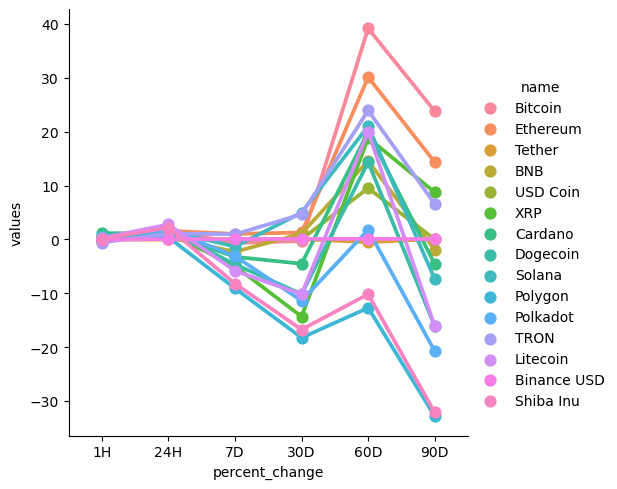

In [63]:
sns.catplot(x='percent_change', y='values', hue='name', data=df_row_pct_chg4, kind='point')

In [105]:
df2 = df_main[['name','quote.USD.price','timestamp']]
df2 = df2.query("name == 'Bitcoin'")
df2

df2_1 = df_main[['name','quote.USD.price','timestamp']]
df2_1 = df2_1.query("name == 'Ethereum'")
df2_1

,name,quote.USD.price,timestamp
1,Ethereum,1872.06856,2023-05-10 13:43:51.004917+00:00
16,Ethereum,1872.65296,2023-05-10 13:44:51.819705+00:00
31,Ethereum,1871.97686,2023-05-10 13:45:52.625367+00:00
46,Ethereum,1875.67083,2023-05-10 13:46:53.387388+00:00
61,Ethereum,1876.07386,2023-05-10 13:47:54.184664+00:00
76,Ethereum,1877.06497,2023-05-10 13:48:55.068155+00:00
91,Ethereum,1876.43507,2023-05-10 13:49:55.860960+00:00


In [106]:
# split the timestamp data by date and time, and split further by hour/second

df2[['date', 'hour_min']] = df2['timestamp'].str.split(' ', expand=True)
df2[['hourmin', 'secs']] = df2['hour_min'].str.split('.', expand=True)
df2

df2_1[['date', 'hour_min']] = df2_1['timestamp'].str.split(' ', expand=True)
df2_1[['hourmin', 'secs']] = df2_1['hour_min'].str.split('.', expand=True)
df2_1

,name,quote.USD.price,timestamp,date,hour_min,hourmin,secs
1,Ethereum,1872.06856,2023-05-10 13:43:51.004917+00:00,2023-05-10,13:43:51.004917+00:00,13:43:51,004917+00:00
16,Ethereum,1872.65296,2023-05-10 13:44:51.819705+00:00,2023-05-10,13:44:51.819705+00:00,13:44:51,819705+00:00
31,Ethereum,1871.97686,2023-05-10 13:45:52.625367+00:00,2023-05-10,13:45:52.625367+00:00,13:45:52,625367+00:00
46,Ethereum,1875.67083,2023-05-10 13:46:53.387388+00:00,2023-05-10,13:46:53.387388+00:00,13:46:53,387388+00:00
61,Ethereum,1876.07386,2023-05-10 13:47:54.184664+00:00,2023-05-10,13:47:54.184664+00:00,13:47:54,184664+00:00
76,Ethereum,1877.06497,2023-05-10 13:48:55.068155+00:00,2023-05-10,13:48:55.068155+00:00,13:48:55,068155+00:00
91,Ethereum,1876.43507,2023-05-10 13:49:55.860960+00:00,2023-05-10,13:49:55.860960+00:00,13:49:55,860960+00:00


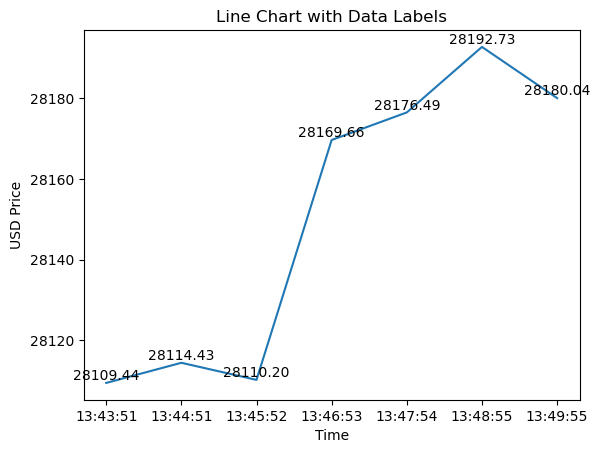

In [104]:
ax = sns.lineplot(x='hourmin', y='quote.USD.price', data=df2)

# Add data labels
for index, row in df2.iterrows():
    label = '{:.2f}'.format(row['quote.USD.price'])  # Format the label to two decimal points
    plt.text(row['hourmin'], row['quote.USD.price'], label, ha='center', va='bottom')

# Set labels and title
plt.xlabel('Time')
plt.ylabel('USD Price')
plt.title('Line Chart with Data Labels')

# Display the plot
plt.show()

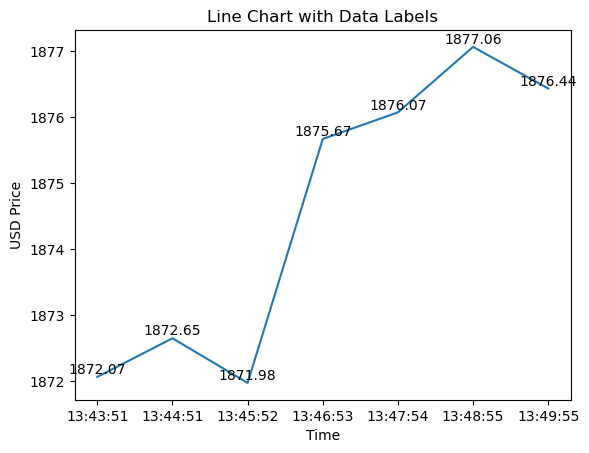

In [107]:
ax = sns.lineplot(x='hourmin', y='quote.USD.price', data=df2_1)

# Add data labels
for index, row in df2_1.iterrows():
    label = '{:.2f}'.format(row['quote.USD.price'])  # Format the label to two decimal points
    plt.text(row['hourmin'], row['quote.USD.price'], label, ha='center', va='bottom')

# Set labels and title
plt.xlabel('Time')
plt.ylabel('USD Price')
plt.title('Line Chart with Data Labels')

# Display the plot
plt.show()